HOW CO2 IS INFLUENCE ON POLAND GDP  

In [112]:
# Import necessary librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [113]:
# Open data
df = pd.read_csv("D:\\CODS\\! Data Science - Portfolio Projects\\! IN PROGRESS\\4. REGRESSION - CO2 vs GDP World\\co2-emissions-vs-gdp.csv", 
                 usecols=["Entity", "Year", "Annual CO₂ emissions (per capita)","GDP per capita"])
df.head()

,Entity,Year,Annual CO₂ emissions (per capita),GDP per capita
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1949,0.001992,NaN
2,Afghanistan,1950,0.011266,1156.0
3,Afghanistan,1951,0.012098,1170.0
4,Afghanistan,1952,0.011946,1189.0


In [114]:
# Filter data and grab only for POLAND
filterPoland = df.Entity == "Poland"
filterYear = df.Year > 1899
dfPoland = df[filterPoland & filterYear]
dfPoland.head()

,Entity,Year,Annual CO₂ emissions (per capita),GDP per capita
44847,Poland,1900,2.603850,2700.0
44848,Poland,1901,2.731647,NaN
44849,Poland,1902,2.655176,NaN
44850,Poland,1903,2.757266,NaN
44851,Poland,1904,2.773719,NaN


In [115]:
# Check null values
dfPoland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 44847 to 44969
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             123 non-null    object 
 1   Year                               123 non-null    int64  
 2   Annual CO₂ emissions (per capita)  123 non-null    float64
 3   GDP per capita                     85 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [116]:
dfPoland = dfPoland.copy()
dfPoland.dropna(inplace=True)
dfPoland.isnull().sum()

Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
GDP per capita                       0
dtype: int64

In [117]:
# Change columns name
patternName = {"Annual CO₂ emissions (per capita)":"Annual_CO2_emission_per_capita", "GDP per capita":"GDP_per_capita"}
dfPoland.rename(patternName, axis="columns", inplace=True)
dfPoland.head()

,Entity,Year,Annual_CO2_emission_per_capita,GDP_per_capita
44847,Poland,1900,2.603850,2700.0
44857,Poland,1910,3.663219,2694.0
44860,Poland,1913,4.602459,2772.0
44867,Poland,1920,3.210359,3000.0
44876,Poland,1929,2.686846,3374.0


C:\Users\User\AppData\Local\Temp\ipykernel_10868\1937692613.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=10)


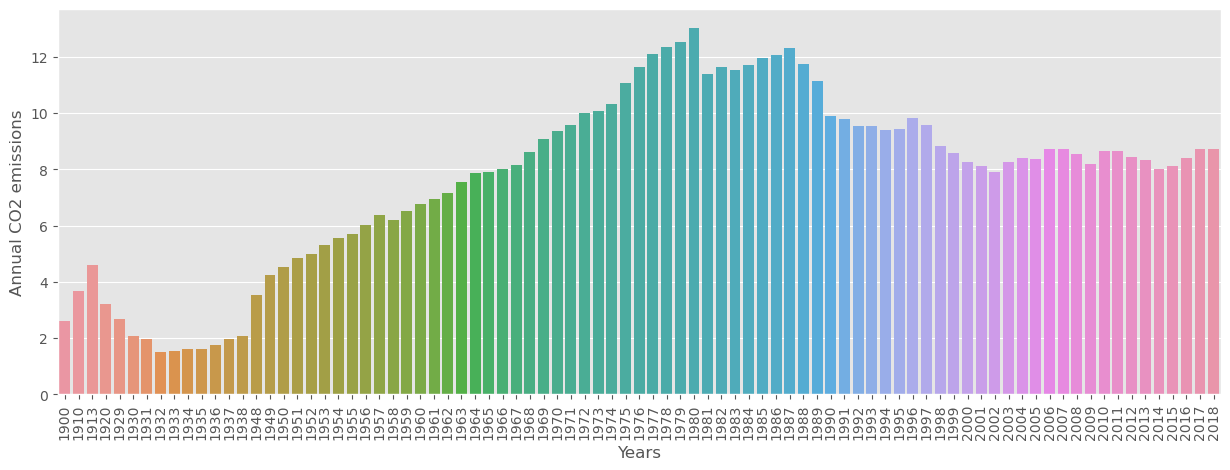

In [138]:
# Make plot for better understand data diestribution and trends
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=10)
sns.barplot(data = dfPoland, x = "Year", y = "Annual_CO2_emission_per_capita",ax=ax)
plt.ylabel("Annual CO2 emissions")
plt.xlabel("Years")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10868\2423591430.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=10)


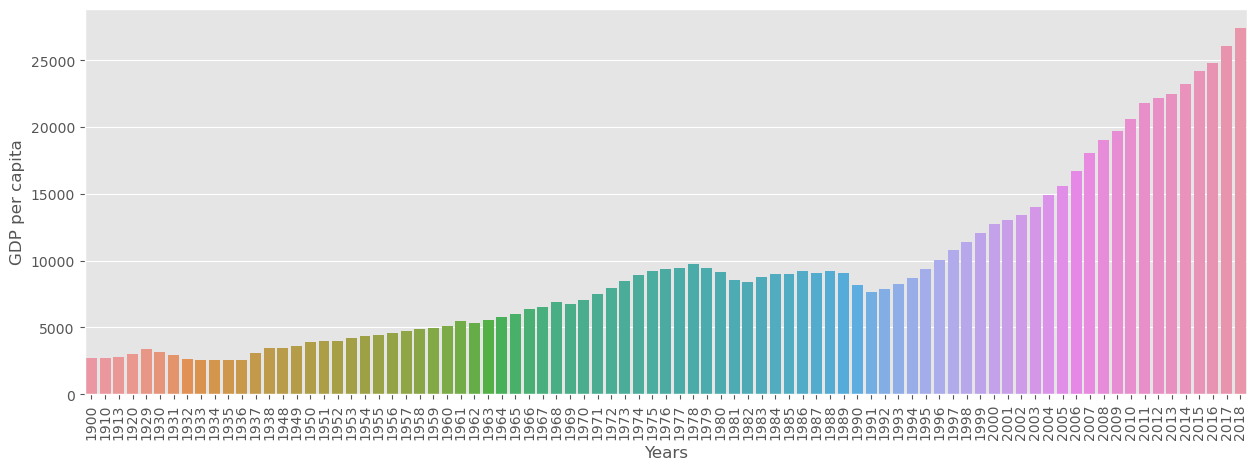

In [141]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=10)
sns.barplot(data = dfPoland, x = "Year", y = "GDP_per_capita",ax=ax)
plt.ylabel("GDP per capita")
plt.xlabel("Years")
plt.show()

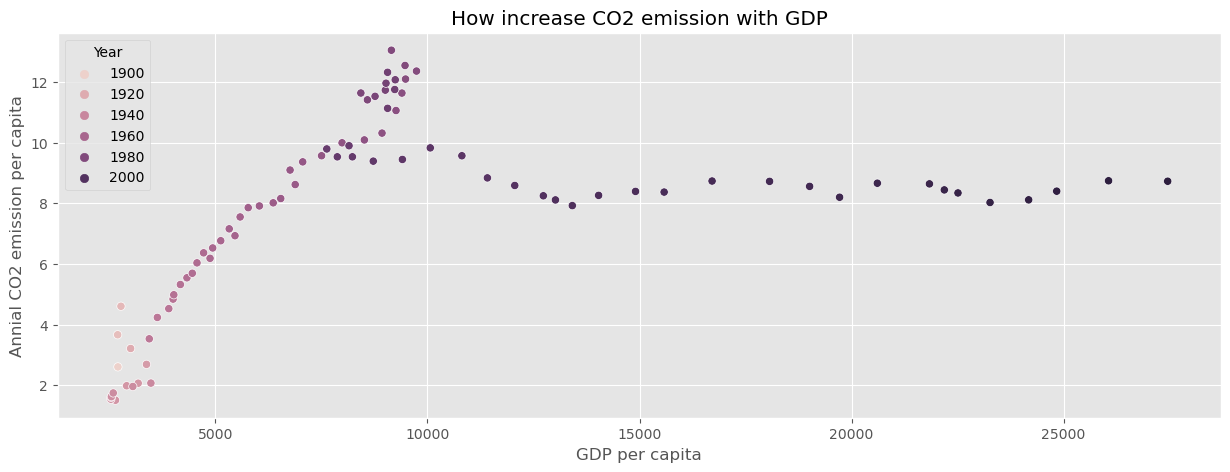

In [150]:
# Make plot for better understand relations between features
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfPoland, x="GDP_per_capita", y="Annual_CO2_emission_per_capita", hue = "Year")
plt.title("How increase CO2 emission with GDP")
plt.xlabel("GDP per capita")
plt.ylabel("Annial CO2 emission per capita")
plt.show()

In [155]:
# Check correlatiob between features
dfcorr = dfPoland[["Annual_CO2_emission_per_capita", "GDP_per_capita"]].corr()
dfcorr

,Annual_CO2_emission_per_capita,GDP_per_capita
Annual_CO2_emission_per_capita,1.000000,0.447681
GDP_per_capita,0.447681,1.000000


<Axes: >

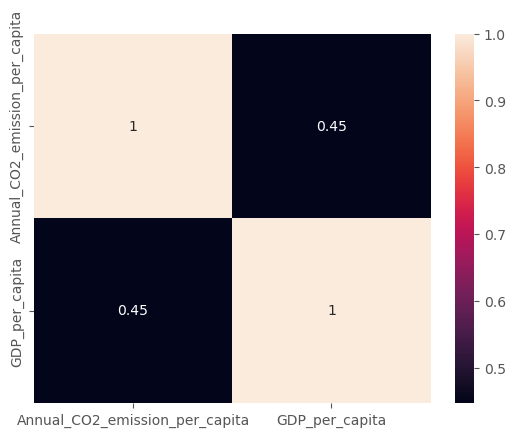

In [156]:
sns.heatmap(dfcorr, annot=True)